In [12]:
import scipy
from scipy import random, linalg
from matplotlib import pyplot
import numpy as np
import timeit
from functools import partial
import matplotlib.pyplot as plt
from matplotlib import cm

In [45]:
def ldl_decomposition_rank_one_update(l, d, alpha, w):
    assert l.shape[0] == l.shape[1]
    assert d.shape[0] == l.shape[1]
    assert w.shape[0] == l.shape[1]
    assert alpha > 0

    size = l.shape[1]
    d_new = np.zeros(size)
    l_new = np.zeros((size, size))
    beta = np.zeros(size)
    w = np.copy(w)

    for j in range(0, size):
        if not np.allclose(w[j], 0.0):
            if not np.allclose(d[j], 0.0):
                p = w[j]
                d_new[j] = d[j] + alpha * (p ** 2.0)
                b =  alpha / d_new[j]
                beta[j] = p * b
                alpha = b * d[j]
                for r in range(j, size):
                    w[r] = w[r] - (p * l[r, j])
                    l_new[r, j] = l[r, j] + beta[j] * w[r]
            else:
                p = w[j]
                d_new[j] = alpha * (p ** 2.0)
                beta[j] = 1.0 / p
                for r in range(j, size):
                    l_new[r,j] = beta[j] * w[r]
                for i in range(j + 1, size):
                    d_new[j] = d[i]
                    for r in range(i, size):
                        l_new[r,i] = l[r,i]
                break
        else:
            d_new[j] = d[j]
            alpha = alpha
            for r in range(j, size):
                w[r] = w[r]
                l_new[r,j] = l[r,j]

    return l_new, d_new


def benchmark_rankoneupdate_ldl_decomposition(no_of_segments, no_of_constraints):
    l = np.identity(no_of_constraints)
    d = np.zeros(no_of_constraints)

    for i in range(no_of_segments):
        w = np.random.rand(no_of_constraints)
        alpha = np.random.rand(1)
        l, d = ldl_decomposition_rank_one_update(l, d, alpha, w)


def benchmark_rankoneupdate(no_of_segments, no_of_constraints):
    L = np.zeros((no_of_constraints, no_of_constraints))

    for i in range(no_of_segments):
        w = np.random.rand(no_of_constraints)
        alpha = np.random.rand(1)
        outer_product_w = np.outer(w, w)
        L = L + alpha * outer_product_w

    lu, d, perm = scipy.linalg.ldl(L)

def benchmark_svd(no_of_segments, no_of_constraints):
    L = np.zeros((no_of_constraints, no_of_constraints))   
    
    for i in range(no_of_segments):
        w = np.random.rand(no_of_constraints)
        alpha = np.random.rand(1)
        outer_product_w = np.outer(w, w)
        L = L + alpha * outer_product_w
        
    U,S,Vt = np.linalg.svd(L)
    
    
    

# def Plot_timecomplexity(n_times,n_min,nInc):
#     x = []
#     y = []

#     benchmark1 = "benchmark_rankoneupdate_ldl_decomposition(6, 40)"
#     setup1 = "from __main__ import benchmark_rankoneupdate_ldl_decomposition"
    
#     benchmark2 = "benchmark_rankoneupdate(6, 40)"
#     setup2 = "from __main__ import benchmark_rankoneupdate"
#     for i in range(n_min,n_max,nInc):
#         x.append(n_times)
#         t1 = timeit.timeit(stmt=benchmark1, setup=setup1, number=n_times)
#         print("in microsec", t1 / n_times * 1000000)
#         y.append(t1)
#         t2 = timeit.timeit(stmt=benchmark2, setup=setup2, number=n_times)
#         print("in microsec", t2 / n_times * 1000000)
#         y.append(t2)
#     plt.plot(x,y,'o')
#     plt.xlabel('Number of runs')
#     plt.ylabel('Time taken')
#     plt.show()

# if __name__ == "__main__":
#     Plot_timecomplexity(1000,900,100)
    

In [11]:
# import time

# function_1 = []
# function_2 = []
# function_3 = []
# n_constraints = 60
# n_segments  = 7
# n_times = 100
# # for ntimes in range(1000,10000, 100):
# # for _ in range(1,n_segments,10):      
# for i in range(1,n_constraints,10):
#     start_time = time.time()
#     for j in range(n_times):
#         benchmark_rankoneupdate_ldl_decomposition(n_segments,i)
#     duration = (time.time() - start_time)/n_times
#     function_1.append(duration)
#     start_time = time.time()
#     for j in range(n_times):
#         benchmark_rankoneupdate(n_segments,i)
#     duration = (time.time() - start_time)/n_times
#     function_2.append(duration)
#     start_time = time.time()
#     for j in range(n_times):
#         benchmark_svd(n_segments,i)
#     duration = (time.time() - start_time)/n_times
#     function_3.append(duration)


In [ ]:
# funct_1 = []
# funct_2 = []
# funct_3 = []
# n_constraints = 6
# n_segments  = 50
# n_times = 100
# # for ntimes in range(1000,10000, 100):
# # for _ in range(1,n_segments,10):      
# for i in range(1,n_segments,10):
#     start_time = time.time()
#     for j in range(n_times):
#         benchmark_rankoneupdate_ldl_decomposition(i,n_constraints)
#     duration = (time.time() - start_time)/n_times
#     funct_1.append(duration)
#     start_time = time.time()
#     for j in range(n_times):
#         benchmark_rankoneupdate(i,n_constraints)
#     duration = (time.time() - start_time)/n_times
#     funct_2.append(duration)
#     start_time = time.time()
#     for j in range(n_times):
#         benchmark_svd(i,n_constraints)
#     duration = (time.time() - start_time)/n_times
#     funct_3.append(duration)


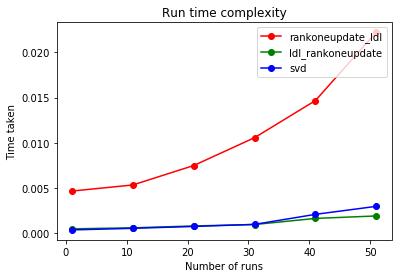

In [12]:
# plt.plot(range(1,n_segments,10), function_1,'o-',label='rankoneupdate_ldl',color='red') 
# plt.plot(range(1,n_segments,10), function_2,'o-',label='ldl_rankoneupdate',color='green') 
# plt.plot(range(1,n_segments,10), function_3,'o-',label='svd',color='blue')
# # plt.plot(loc='upper left')
# # plt.xlabel('Number of runs')
# # plt.ylabel('Time taken')
# # plt.title('Run time complexity')
# # plt.legend(loc='upper right')

# # plt.show()
# plt.plot(range(1,n_constraints,10), function_1,'o-',label='rankoneupdate_ldl',color='red') 
# plt.plot(range(1,n_constraints,10), function_2,'o-',label='ldl_rankoneupdate',color='green') 
# plt.plot(range(1,n_constraints,10), function_3,'o-',label='svd',color='blue')

In [49]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

constraint_values = np.arange(1,30,1)
segment_values = np.arange(1, 20,1)

constraint_values = constraint_values.astype('int')
segment_values = segment_values.astype('int')

cv, sv = np.meshgrid(constraint_values, segment_values)
n_times = 10000

run_time_ldl = np.zeros(cv.shape)
run_time_ldl_dec = np.zeros(cv.shape)
run_time_svd = np.zeros(cv.shape)

for i in range(cv.shape[0]):
    for j in range(cv.shape[1]):
        start = time.time()
        for _ in range(n_times):
            benchmark_rankoneupdate(sv[i,j], cv[i,j])
        end = time.time()      
        run_time = (end-start)/n_times
        run_time_ldl[i][j] = run_time
        
        start = time.time()
        for _ in range(n_times):
            benchmark_rankoneupdate_ldl_decomposition(sv[i,j], cv[i,j])
        end = time.time()       
        run_time = (end-start)/n_times
        run_time_ldl_dec[i][j] = run_time
        
        start = time.time()
        for _ in range(n_times):
            benchmark_svd(sv[i,j], cv[i,j])
        end = time.time()       
        run_time = (end-start)/n_times
        run_time_svd[i][j] = run_time


<IPython.core.display.Javascript object>


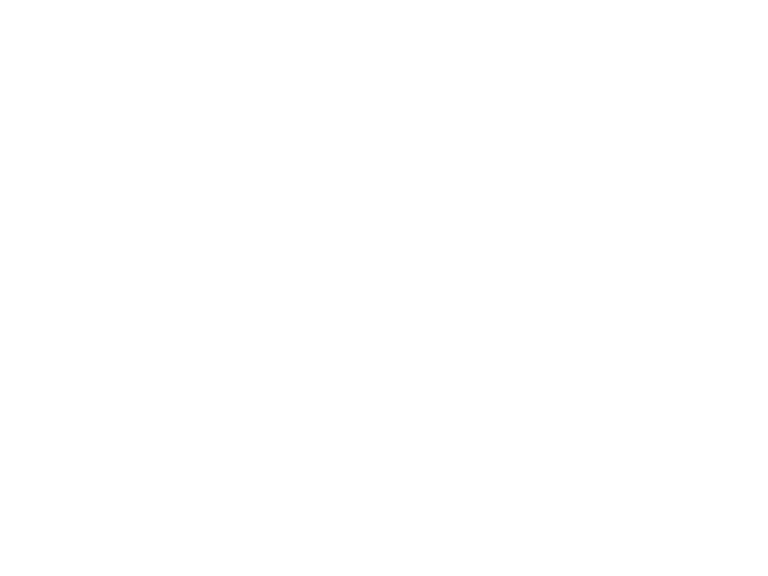

<IPython.core.display.Javascript object>


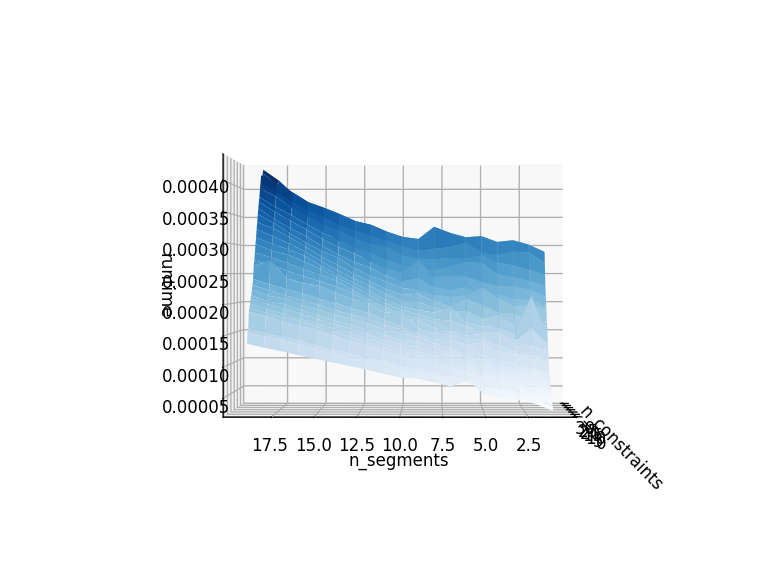

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

%matplotlib notebook
# ax.plot_surface(cv, sv, run_time_ldl,cmap=cm.Greens)
# ax.plot_surface(cv, sv, run_time_ldl_dec,cmap=cm.autumn)
ax.plot_surface(cv, sv, run_time_svd,cmap=cm.Blues)


ax.set_xlabel('n_constraints')
ax.set_ylabel('n_segments')
ax.set_zlabel('runtime');
fig

<IPython.core.display.Javascript object>


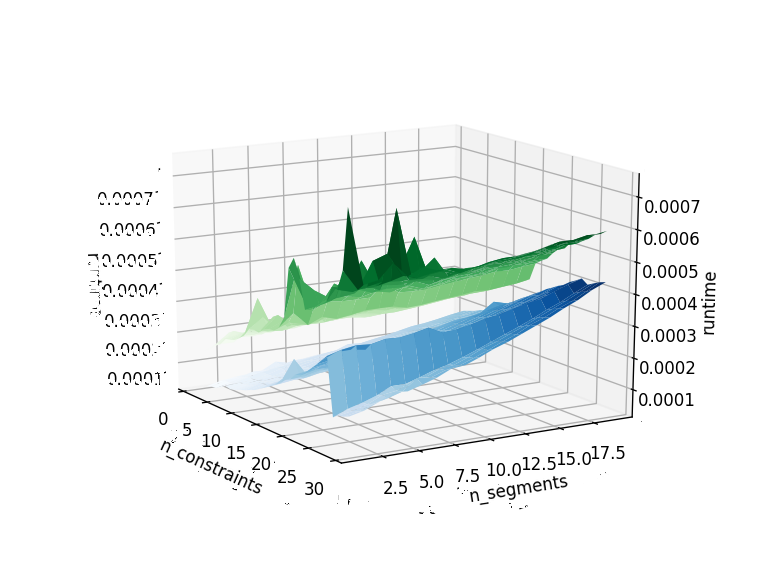

In [66]:
ax.view_init(20, 60)
fig

<IPython.core.display.Javascript object>


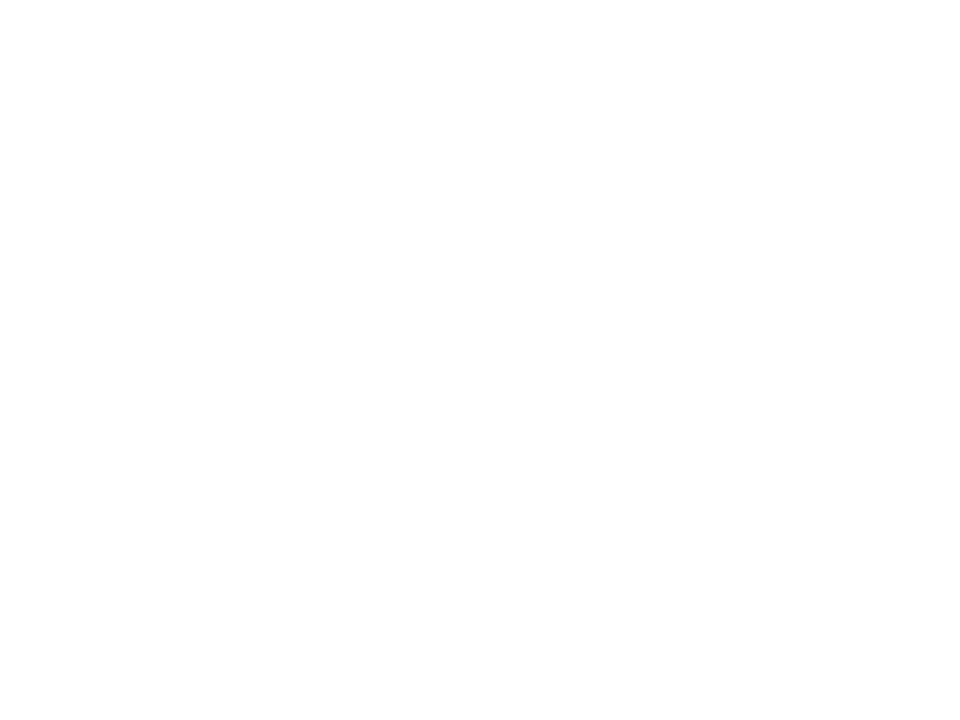

<IPython.core.display.Javascript object>


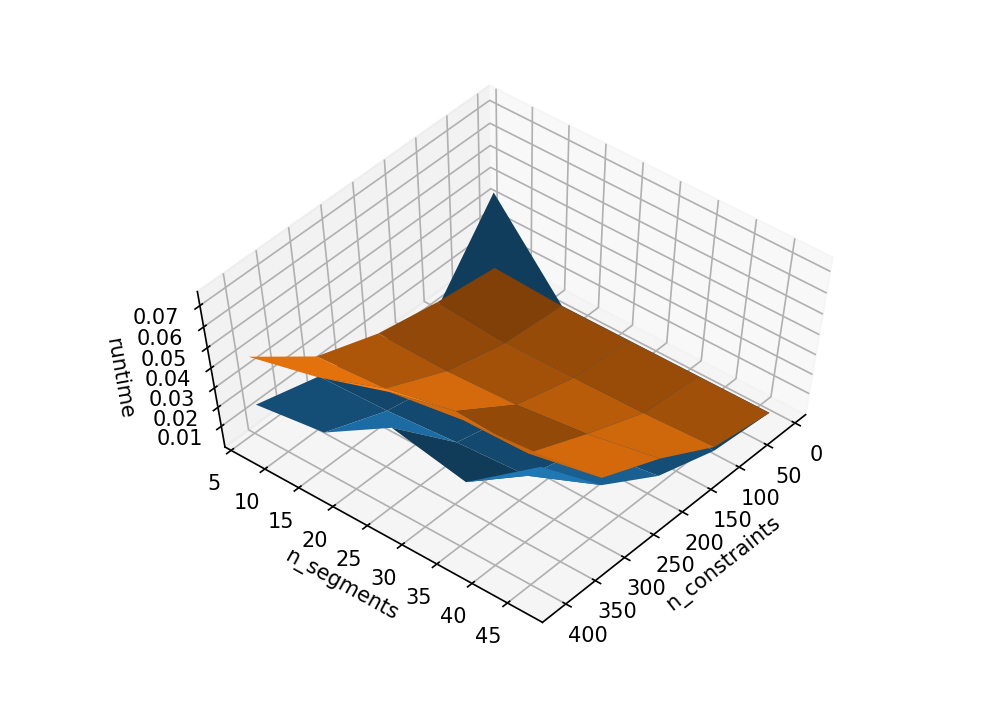

<IPython.core.display.Javascript object>


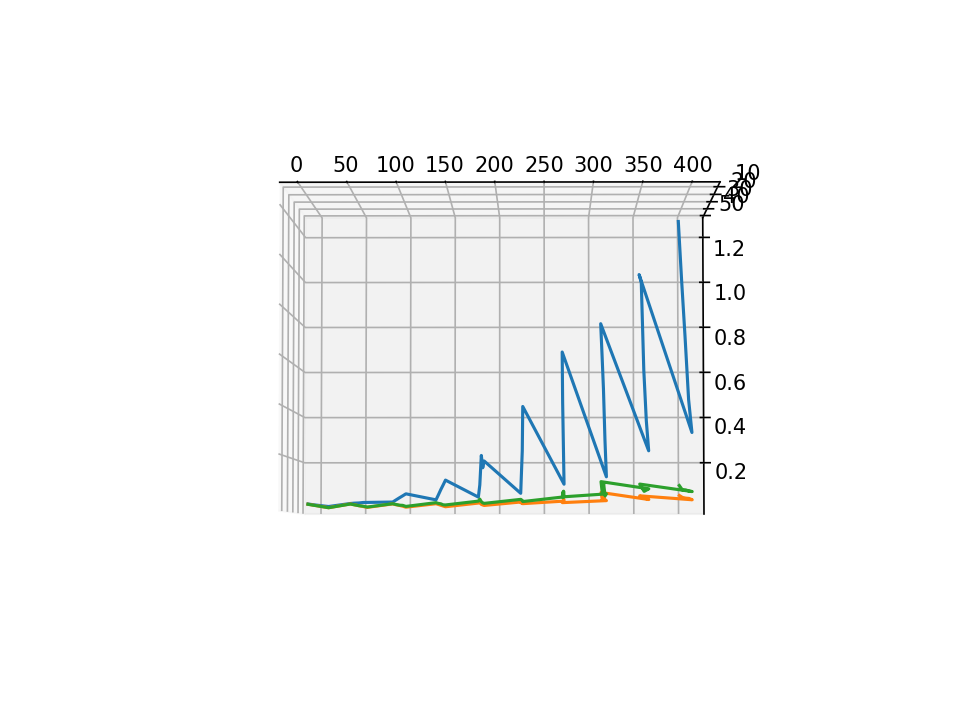

In [22]:
# import scipy
# from scipy import random, linalg
# from matplotlib import pyplot
# import numpy as np
# import timeit
# from functools import partial
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# from mpl_toolkits.mplot3d import Axes3D

# def ldl_decomposition_rank_one_update(l, d, alpha, w):
#     assert l.shape[0] == l.shape[1]
#     assert d.shape[0] == l.shape[1]
#     assert w.shape[0] == l.shape[1]
#     assert alpha > 0

#     size = l.shape[1]
#     d_new = np.zeros(size)
#     l_new = np.zeros((size, size))
#     beta = np.zeros(size)
#     w = np.copy(w)

#     for j in range(0, size):
#         if not np.allclose(w[j], 0.0):
#             if not np.allclose(d[j], 0.0):
#                 p = w[j]
#                 d_new[j] = d[j] + alpha * (p ** 2.0)
#                 b =  alpha / d_new[j]
#                 beta[j] = p * b
#                 alpha = b * d[j]
#                 for r in range(j, size):
#                     w[r] = w[r] - (p * l[r, j])
#                     l_new[r, j] = l[r, j] + beta[j] * w[r]
#             else:
#                 p = w[j]
#                 d_new[j] = alpha * (p ** 2.0)
#                 beta[j] = 1.0 / p
#                 for r in range(j, size):
#                     l_new[r,j] = beta[j] * w[r]
#                 for i in range(j + 1, size):
#                     d_new[j] = d[i]
#                     for r in range(i, size):
#                         l_new[r,i] = l[r,i]
#                 break
#         else:
#             d_new[j] = d[j]
#             alpha = alpha
#             for r in range(j, size):
#                 w[r] = w[r]
#                 l_new[r,j] = l[r,j]

#     return l_new, d_new


# def benchmark_rankoneupdate_ldl_decomposition(no_of_segments, no_of_constraints):
#     l = np.identity(no_of_constraints)
#     d = np.zeros(no_of_constraints)

#     for i in range(no_of_segments):
#         w = np.random.rand(no_of_constraints)
#         alpha = np.random.rand(1)
#         l, d = ldl_decomposition_rank_one_update(l, d, alpha, w)


# def benchmark_rankoneupdate(no_of_segments, no_of_constraints):
#     L = np.zeros((no_of_constraints, no_of_constraints))

#     for i in range(no_of_segments):
#         w = np.random.rand(no_of_constraints)
#         alpha = np.random.rand(1)
#         outer_product_w = np.outer(w, w)
#         L = L + alpha * outer_product_w

#     lu, d, perm = scipy.linalg.ldl(L)

# def benchmark_svd(no_of_segments, no_of_constraints):
#     L = np.zeros((no_of_constraints, no_of_constraints))   
    
#     for i in range(no_of_segments):
#         w = np.random.rand(no_of_constraints)
#         alpha = np.random.rand(1)
#         outer_product_w = np.outer(w, w)
#         L = L + alpha * outer_product_w
        
#     U,S,Vt = np.linalg.svd(L)
    

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# constraint_values = np.linspace(10,400,10)
# segment_values = np.linspace(7, 50, 5)

# constraint_values = constraint_values.astype('int')
# segment_values = segment_values.astype('int')
# n_times = 10
# final_values1 = []
# final_values2 = []
# final_values3 = []
# for cv in constraint_values:
#     for sv in segment_values:
#         start = time.time()
#         for _ in range(n_times):
#             benchmark_rankoneupdate_ldl_decomposition(sv, cv)
#         end = time.time()
#         run_time = (end-start)/n_times
#         final_values1.append((cv,sv, run_time))
#         start = time.time()
#         for j in range(n_times):
#             benchmark_rankoneupdate(sv, cv)
#         run_time = (time.time() - start)/n_times
#         final_values2.append((cv,sv, run_time))
#         start_time = time.time()
#         for j in range(n_times):
#             benchmark_svd(sv, cv)
#         run_time = (time.time() - start_time)/n_times
#         final_values3.append((cv,sv, run_time)) 

# final_values1 = np.array(final_values1)
# final_values2 = np.array(final_values2)
# final_values3 = np.array(final_values3)
# ax.plot(final_values1[:,0], final_values1[:,1], final_values1[:,2])
# ax.plot(final_values2[:,0], final_values2[:,1], final_values2[:,2])
# ax.plot(final_values3[:,0], final_values3[:,1], final_values3[:,2])
# plt.show()
    

In [44]:
a = np.arange(1,30,1)
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
